In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import glob

In [2]:
train_image_path  = glob.glob('D:/dogcat/train/*/*.jpg')

In [3]:
len(train_image_path)

2000

In [4]:
train_image_path[1].split("\\")

['D:/dogcat/train', 'cat', 'cat.1.jpg']

In [5]:
# 数据集标签划分
train_image_label = [int(p.split('\\')[1] == 'cat') for p in train_image_path]

In [6]:
train_image_label[995:1004]

[1, 1, 1, 1, 1, 0, 0, 0, 0]

In [7]:
def load_preprosess_image(path,label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels=3)
#     image = tf.image.resize(image,[64,64])
    image = tf.image.resize(image,[256,256])
#     image = tf.image.random_flip_left_right(image)
#     image = tf.image.random_flip_up_down(image)
#     image = tf.image.random_brightness(image,0.5)
#     image = tf.image.random_contrast(image,0,1)
    image = tf.cast(image,tf.float32)
    image = image/255
    label = tf.reshape(label,[1])
    return image,label

In [8]:
train_image_ds = tf.data.Dataset.from_tensor_slices((train_image_path,train_image_label))
AUTOTUNE = tf.data.experimental.AUTOTUNE   #参数自动选择最优

In [9]:
k = 0
for i,j in train_image_ds:
    print("path:",i)
    print("label:",j)
    print("-----")
    k+=1
    if k>10:
        break

path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.0.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=int32)
-----
path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.1.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=int32)
-----
path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.10.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=int32)
-----
path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.100.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=int32)
-----
path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.101.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=int32)
-----
path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.102.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=int32)
-----
path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.103.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=int32)
-----
path: tf.Tensor(b'D:/dogcat/train\\cat\\cat.104.jpg', shape=(), dtype=string)
label: tf.Tensor(1, shape=(), dtype=in

In [10]:
# 用map函数把路径上的文件读进来
train_image_d = train_image_ds.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)

In [11]:
len(train_image_path)

2000

In [12]:
# 对图片进行乱序
# shuffle(2000) 设置缓冲区是2000
# batch(10) ，每次取10张
# repeat() 把图片无限循环，有无数的图片，如果括号内传一个参数3，则这个数据集有6000张图片
# prefetch(AUTOTUNE) 预取，先把数据预先导入cpu缓冲区,gpu在处理数据
train_image_d_ = train_image_d.shuffle(2000).batch(10).repeat().prefetch(AUTOTUNE) #把数据集打乱  这里的缓冲区是2000，让乱序效果更好

k= 200
tf.Tensor([0], shape=(1,), dtype=int32)


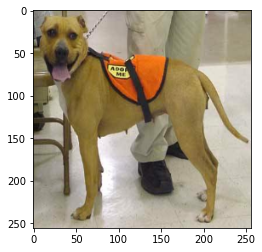

k= 201
tf.Tensor([1], shape=(1,), dtype=int32)


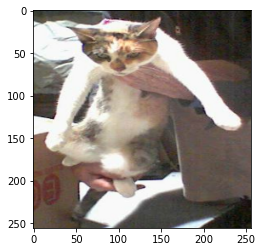

k= 202
tf.Tensor([0], shape=(1,), dtype=int32)


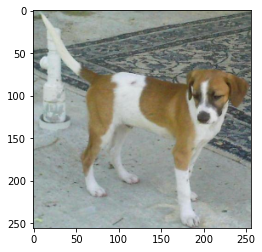

k= 203
tf.Tensor([1], shape=(1,), dtype=int32)


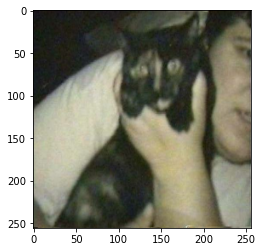

k= 204
tf.Tensor([1], shape=(1,), dtype=int32)


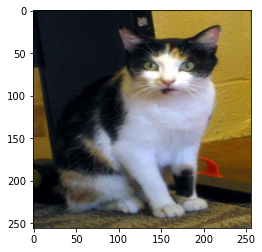

k= 205
tf.Tensor([1], shape=(1,), dtype=int32)


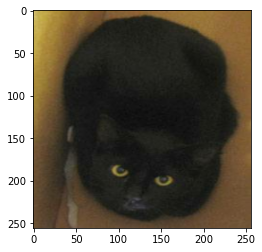

k= 206
tf.Tensor([1], shape=(1,), dtype=int32)


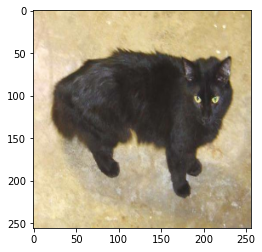

k= 207
tf.Tensor([0], shape=(1,), dtype=int32)


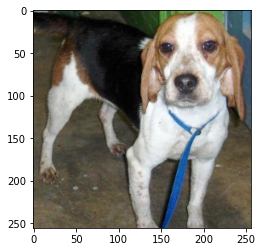

k= 208
tf.Tensor([0], shape=(1,), dtype=int32)


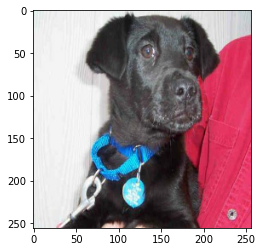

k= 209
tf.Tensor([0], shape=(1,), dtype=int32)


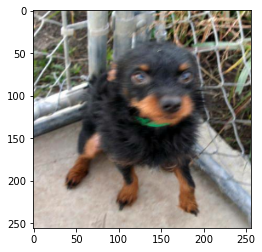

k= 210
tf.Tensor([1], shape=(1,), dtype=int32)


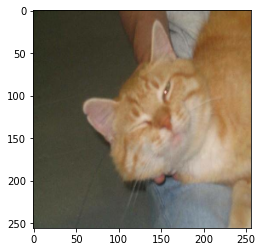

k= 211
tf.Tensor([0], shape=(1,), dtype=int32)


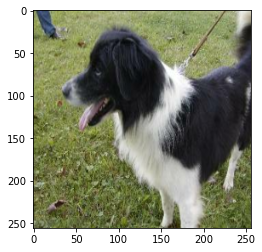

k= 212
tf.Tensor([0], shape=(1,), dtype=int32)


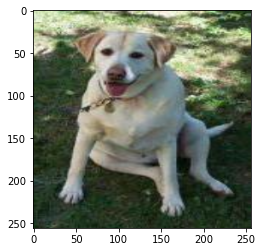

k= 213
tf.Tensor([1], shape=(1,), dtype=int32)


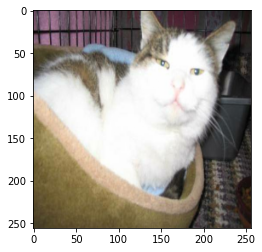

k= 214
tf.Tensor([1], shape=(1,), dtype=int32)


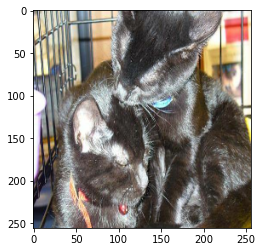

k= 215
tf.Tensor([0], shape=(1,), dtype=int32)


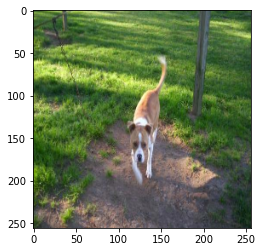

k= 216
tf.Tensor([1], shape=(1,), dtype=int32)


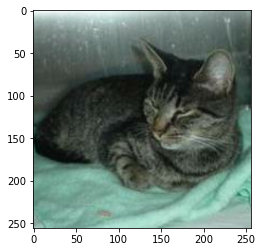

k= 217
tf.Tensor([1], shape=(1,), dtype=int32)


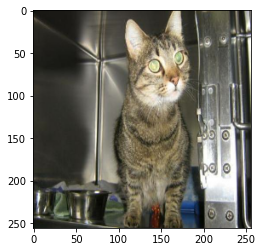

k= 218
tf.Tensor([1], shape=(1,), dtype=int32)


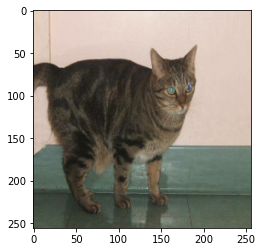

k= 219
tf.Tensor([1], shape=(1,), dtype=int32)


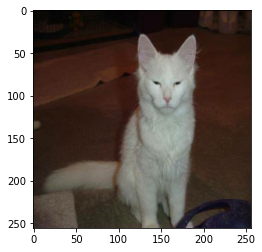

k= 220
tf.Tensor([1], shape=(1,), dtype=int32)


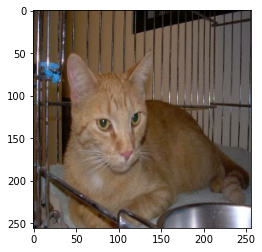

k= 221
tf.Tensor([0], shape=(1,), dtype=int32)


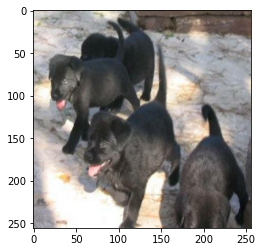

k= 222
tf.Tensor([0], shape=(1,), dtype=int32)


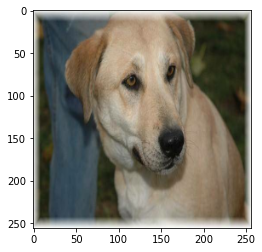

k= 223
tf.Tensor([0], shape=(1,), dtype=int32)


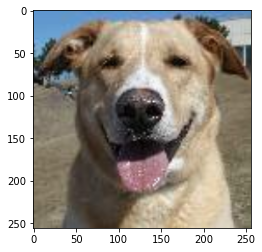

k= 224
tf.Tensor([1], shape=(1,), dtype=int32)


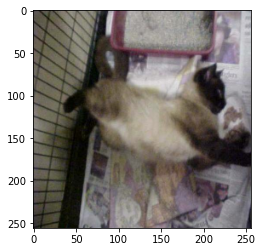

k= 225
tf.Tensor([1], shape=(1,), dtype=int32)


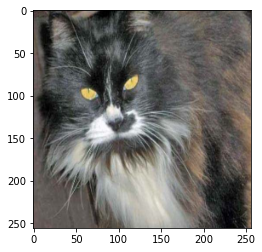

k= 226
tf.Tensor([1], shape=(1,), dtype=int32)


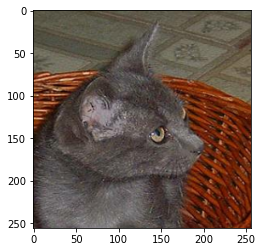

k= 227
tf.Tensor([0], shape=(1,), dtype=int32)


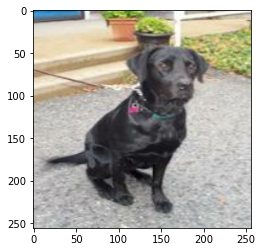

k= 228
tf.Tensor([1], shape=(1,), dtype=int32)


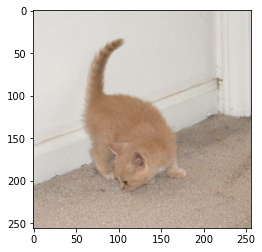

k= 229
tf.Tensor([1], shape=(1,), dtype=int32)


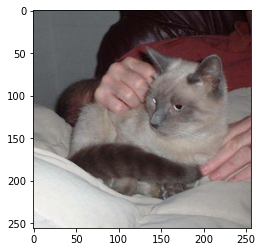

k= 230
tf.Tensor([1], shape=(1,), dtype=int32)


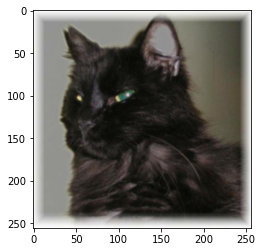

k= 231
tf.Tensor([0], shape=(1,), dtype=int32)


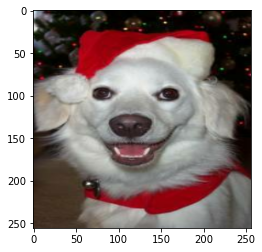

k= 232
tf.Tensor([1], shape=(1,), dtype=int32)


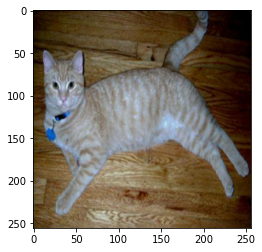

k= 233
tf.Tensor([1], shape=(1,), dtype=int32)


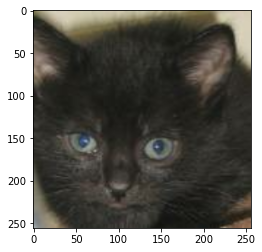

k= 234
tf.Tensor([1], shape=(1,), dtype=int32)


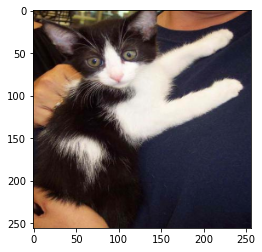

k= 235
tf.Tensor([1], shape=(1,), dtype=int32)


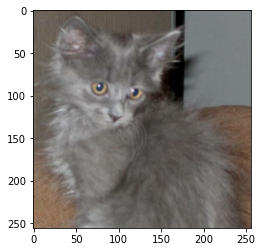

k= 236
tf.Tensor([0], shape=(1,), dtype=int32)


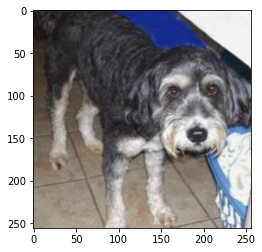

k= 237
tf.Tensor([1], shape=(1,), dtype=int32)


KeyboardInterrupt: 

In [13]:
k = 0
for img,label in train_image_d_:
    k = k+1
    
    if k<200:
        continue
        
    print('k=',k)
    print(label[9])

    plt.imshow(img[9])
    plt.show()
        

In [14]:
BATCH_SIZE = 32
train_count = len(train_image_path)

test_image_path = glob.glob('D:/dogcat/train/*/*.jpg')
test_image_label = [int(p.split('/')[-2]=='dog') for p in test_image_path]

test_image_ds = tf.data.Dataset.from_tensor_slices((test_image_path,test_image_label))
test_image_ds = test_image_ds.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)
test_image_ds = test_image_ds.batch(BATCH_SIZE)
test_image_ds = test_image_ds.shuffle(1000)#.prefetch(AUTOTUNE)
train_image_ds = train_image_ds.repeat().prefetch(AUTOTUNE)


In [15]:
len(test_image_path)

2000

In [16]:
test_image_path[-3:]

['D:/dogcat/train\\dog\\dog.997.jpg',
 'D:/dogcat/train\\dog\\dog.998.jpg',
 'D:/dogcat/train\\dog\\dog.999.jpg']

In [17]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(256,(3,3),input_shape=(256,256,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])



In [18]:
# model = keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(256,256,3)))
# model.add(tf.keras.layers.Dense(1024,activation='relu'))
# model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 256)    1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 256)     590080    
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 256)    1024      
 hNormalization)                                                 
                                                        

In [20]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="acc")

In [ ]:
%%time
his = model.fit(train_image_d_,epochs=5,
               steps_per_epoch=5,
               validation_data=test_image_ds)

Epoch 1/5
5/5 [==============================] - 359s 88s/step - loss: 0.9379 - acc: 0.5600 - val_loss: 0.5287 - val_acc: 1.0000
Epoch 2/5
4/5 [=======================>......] - ETA: 5s - loss: 0.8293 - acc: 0.5250 

In [ ]:
plt.plot(his.epoch,his.history.get("loss"),label='loss')
plt.plot(his.epoch,his.hsitory.get('acc'),label='acc')
plt.grid("on")
plt.legend()